# How to do 'Data Storytelling'

In this notebook, we will be going through the thought-process of how Data Scientists in the real world extract, clean, explore and eventually visualize data to make inferences about real-world problems.

Chicago has been in the news a lot in the last few years especially due to the recent up surge of murders resulting from gun violence. I am aware that most of these shootings are confined to certain parts of the city but to truly understand the the true nature of this violence, I decided to dig deeper into the data available from the City of Chicago.

**Note:** Please make sure you have Seaborn 0.9.0 - as it would be extremely difficult for you to make the same plots as notebook otherwise.

Here are the links I have followed for this notebook:

[Data Storytelling Part One](https://towardsdatascience.com/homicide-in-chicago-data-storytelling-part-one-e6fbd77afc07)

[Data Storytelling Part Two](https://towardsdatascience.com/homicide-in-chicago-data-stroytelling-part-two-e8748602daca)


## Data Cleaning
All the plots in the blog-post, printed in this part.

In [2]:
## libraries needed

import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

### Data Sources are from the following links:
##### Download them before running the code


Link-1: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

Link-2: https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74

In [ ]:
#uses TextFileReader iterable with chunks of 100,000 rows.
tp = read_csv('Crimes_-_2001_to_present.csv', iterator=True, chunksize=100000)  
crime_data = concat(tp, ignore_index=True)  

# prints data's shape
crime_data.shape

In [5]:
crime_data.head()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,10000097,HY189976,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,...,28.0,25.0,03,1144920.0,1898709.0,2015,02/10/2018 03:50:01 PM,41.878065,-87.743354,"(41.878064761, -87.743354013)"


In [6]:
df_homicideN = crime_data[crime_data['Primary Type']=='HOMICIDE']
df_homicideN.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
638,4756,HP587530,09/22/2008 11:24:00 PM,047XX W GLADYS AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,24.0,25.0,01A,1144818.0,1897935.0,2008,08/17/2015 03:03:40 PM,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1241,4757,HP587531,09/22/2008 11:37:00 PM,022XX S KIRKLAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,...,22.0,29.0,01A,1147705.0,1888660.0,2008,08/17/2015 03:03:40 PM,41.850436,-87.733386,"(41.850436084, -87.733385899)"
1786,4758,HP572693,09/23/2008 09:57:00 AM,027XX W POPE JOHN PAUL II DR,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,True,True,...,12.0,58.0,01A,1158655.0,1876028.0,2008,08/17/2015 03:03:40 PM,41.815555,-87.693543,"(41.815555438, -87.693542513)"
2282,4759,HP588309,09/23/2008 01:40:00 PM,056XX W 64TH ST,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,13.0,64.0,01A,1139888.0,1861562.0,2008,08/17/2015 03:03:40 PM,41.776221,-87.762736,"(41.776221083, -87.762736483)"
2895,4760,HP589244,09/23/2008 08:25:00 PM,088XX S PRAIRIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,False,False,...,6.0,44.0,01A,1179584.0,1846297.0,2008,08/17/2015 03:03:40 PM,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [9]:
df_homicide = df_homicideN.dropna()
df_homicide.isnull().sum().sum()

0

In [10]:
keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']

df_homicide = df_homicide[keep_cols].reset_index()
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,638,2008,09/22/2008 11:24:00 PM,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1241,2008,09/22/2008 11:37:00 PM,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1786,2008,09/23/2008 09:57:00 AM,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2282,2008,09/23/2008 01:40:00 PM,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2895,2008,09/23/2008 08:25:00 PM,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [11]:
df_homicide['Date'] = df_homicide['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,638,2008,2008-09-22 23:24:00,HOMICIDE,False,False,11.0,STREET,01A,1144818.0,1897935.0,41.875943,-87.743748,"(41.875942734, -87.743748059)"
1,1241,2008,2008-09-22 23:37:00,HOMICIDE,False,False,10.0,STREET,01A,1147705.0,1888660.0,41.850436,-87.733386,"(41.850436084, -87.733385899)"
2,1786,2008,2008-09-23 09:57:00,HOMICIDE,True,True,9.0,HOUSE,01A,1158655.0,1876028.0,41.815555,-87.693543,"(41.815555438, -87.693542513)"
3,2282,2008,2008-09-23 13:40:00,HOMICIDE,False,False,8.0,ALLEY,01A,1139888.0,1861562.0,41.776221,-87.762736,"(41.776221083, -87.762736483)"
4,2895,2008,2008-09-23 20:25:00,HOMICIDE,False,False,6.0,ALLEY,01A,1179584.0,1846297.0,41.733517,-87.617679,"(41.733517296, -87.617679154)"


In [14]:
df_homicide['Year'] = df_homicide['Date'].dt.year
df_homicide['Month'] = df_homicide['Date'].dt.month
df_homicide['Day'] = df_homicide['Date'].dt.day
df_homicide['Weekday'] = df_homicide['Date'].dt.dayofweek
df_homicide['HourOfDay'] = df_homicide['Date'].dt.hour

df_homicide = df_homicide.sort_values('Date')
# print columns list and info

df_homicide

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Month,Day,Weekday,HourOfDay
505,697802,2001,2001-01-01 10:40:00,HOMICIDE,False,False,11.0,CHA STAIRWELL,01A,1159921.0,1899604.0,41.880225,-87.688249,"(41.880224549, -87.688248952)",1,1,0,10
506,697881,2001,2001-01-01 15:10:00,HOMICIDE,False,False,14.0,AUTO,01A,1156620.0,1915710.0,41.924488,-87.699933,"(41.924488265, -87.699933231)",1,1,0,15
507,698235,2001,2001-01-06 08:54:00,HOMICIDE,False,False,12.0,AUTO,01A,1165996.0,1891724.0,41.858474,-87.666167,"(41.858473695, -87.666167161)",1,6,5,8
508,698337,2001,2001-01-06 13:30:00,HOMICIDE,True,False,5.0,ALLEY,01A,1171768.0,1827002.0,41.680744,-87.646876,"(41.680743671, -87.646876459)",1,6,5,13
509,698439,2001,2001-01-06 23:38:00,HOMICIDE,True,False,25.0,STREET,01A,1137239.0,1915361.0,41.923901,-87.771157,"(41.923901331, -87.771156586)",1,6,5,23
510,698711,2001,2001-01-09 13:30:00,HOMICIDE,True,False,4.0,STREET,01A,1199187.0,1847605.0,41.736637,-87.545821,"(41.736636821, -87.545821131)",1,9,1,13
511,698921,2001,2001-01-10 01:59:00,HOMICIDE,True,False,17.0,STREET,01A,1150399.0,1932961.0,41.971950,-87.722340,"(41.971950157, -87.722340107)",1,10,2,1
512,699042,2001,2001-01-10 20:00:00,HOMICIDE,True,False,3.0,STREET,01A,1189946.0,1857893.0,41.765095,-87.579346,"(41.765095068, -87.579346236)",1,10,2,20
513,699128,2001,2001-01-11 04:30:00,HOMICIDE,True,True,3.0,APARTMENT,01A,1189943.0,1857990.0,41.765361,-87.579354,"(41.765361316, -87.579354115)",1,11,3,4
514,699487,2001,2001-01-11 19:20:00,HOMICIDE,True,True,15.0,APARTMENT,01A,1137283.0,1899267.0,41.879737,-87.771382,"(41.879736623, -87.771382283)",1,11,3,19


**Its better to compress the data and save it in pickle form to use it easily in future, too difficult to handle ':)**

In [17]:
df_homicide.to_pickle('df_homicide.pkl') 
print('pickle size:', os.stat('df_homicide.pkl').st_size)

('pickle size:', 1398725)


## Data Exploration and Visualization

In [2]:
df_homicide = pd.read_pickle('df_homicide.pkl')

Text(0.5,1,'All Homicides (2001-Present) per District')

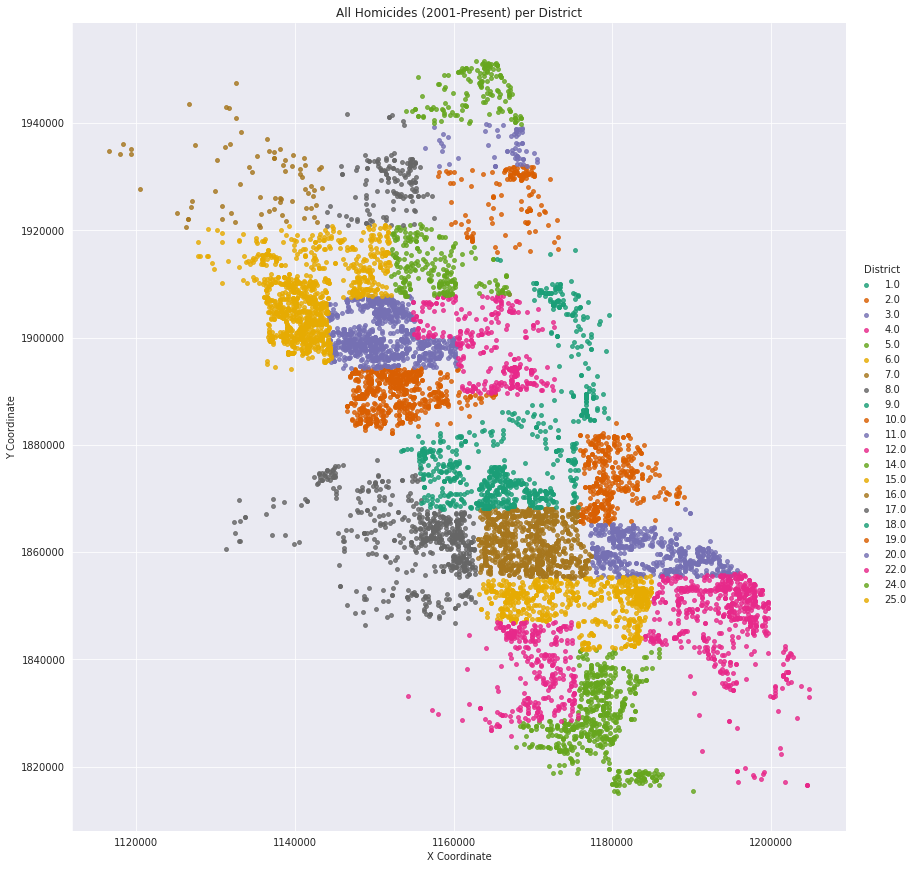

In [11]:
# plot all homicides in dataset by location per District
df_homicide = df_homicide.loc[(df_homicide['X Coordinate']!=0)]
sns.lmplot('X Coordinate',
           'Y Coordinate',
           data=df_homicide[:],
           fit_reg=False, 
           hue="District", 
           palette='Dark2',
           size=12,
           ci=2,
           scatter_kws={"marker": "P", 
                        "s": 15}) 
ax = plt.gca()
ax.set_title("All Homicides (2001-Present) per District")

In [112]:
# plot bar chart of homicide rates for all years
def color_palette(values):
    values = df_homicide.groupby(['Year'])['Primary Type'].value_counts().unstack().reset_index()
    clrs = []
    below = np.percentile(values['HOMICIDE'], 40) # return 50th percentile, e.g median.
    med = np.percentile(values['HOMICIDE'], 90)
    for x in values['HOMICIDE']:
        if (x <= below):
            clrs.append('green')
        elif (x > below  and x <= med):
            clrs.append('orange')
        elif (x>med):
            clrs.append('maroon')
    return clrs

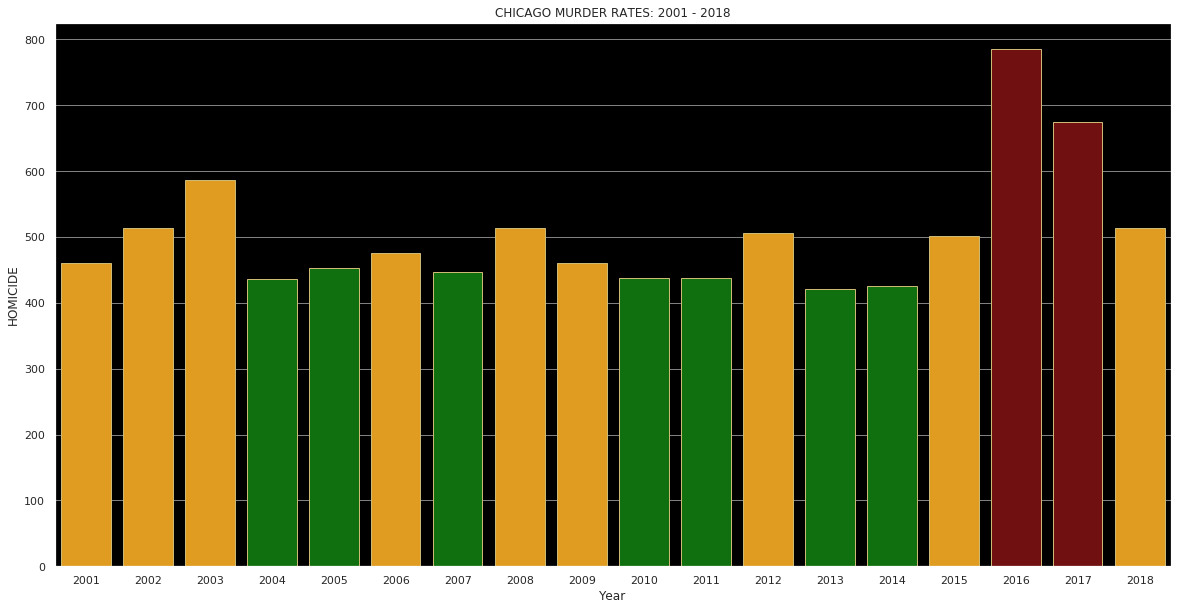

In [131]:
plt.figure(figsize=(20,10))
sns.set()
sns.set_style({"axes.facecolor": "0",'grid.color': '0.5', 'patch.edgecolor': 'y'})
values = df_homicide.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index()
clrs = color_palette(values)

t = sns.barplot(x='Year',
            y='HOMICIDE',
            data=values,
           palette = clrs).\
            set_title("CHICAGO MURDER RATES: 2001 - 2018")


Text(0.5,1,'CHICAGO Temperature by MONTH')

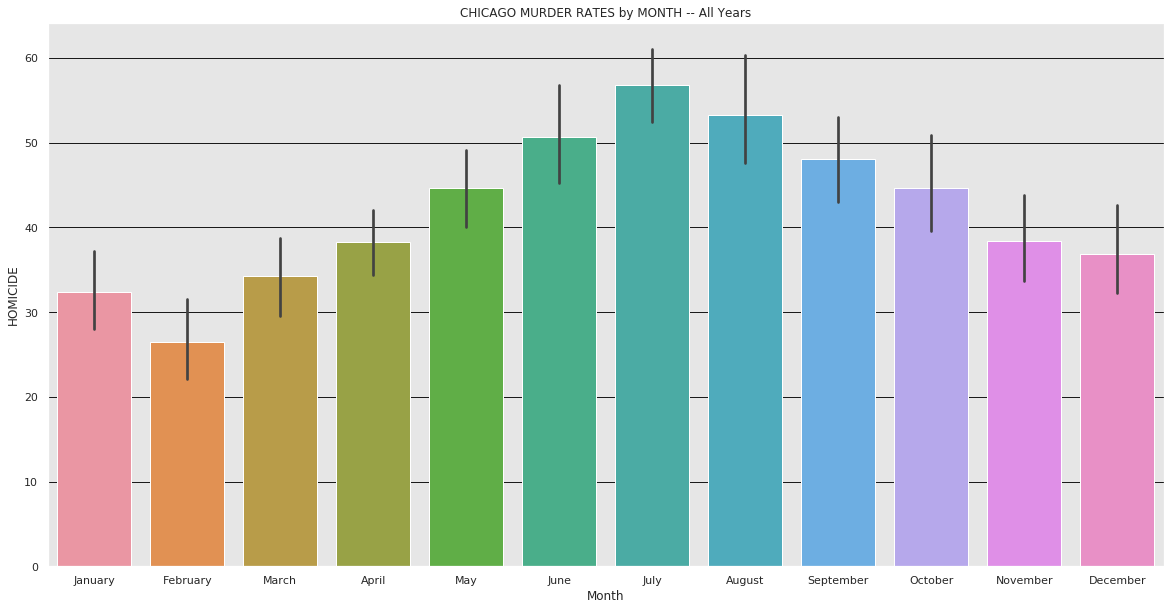

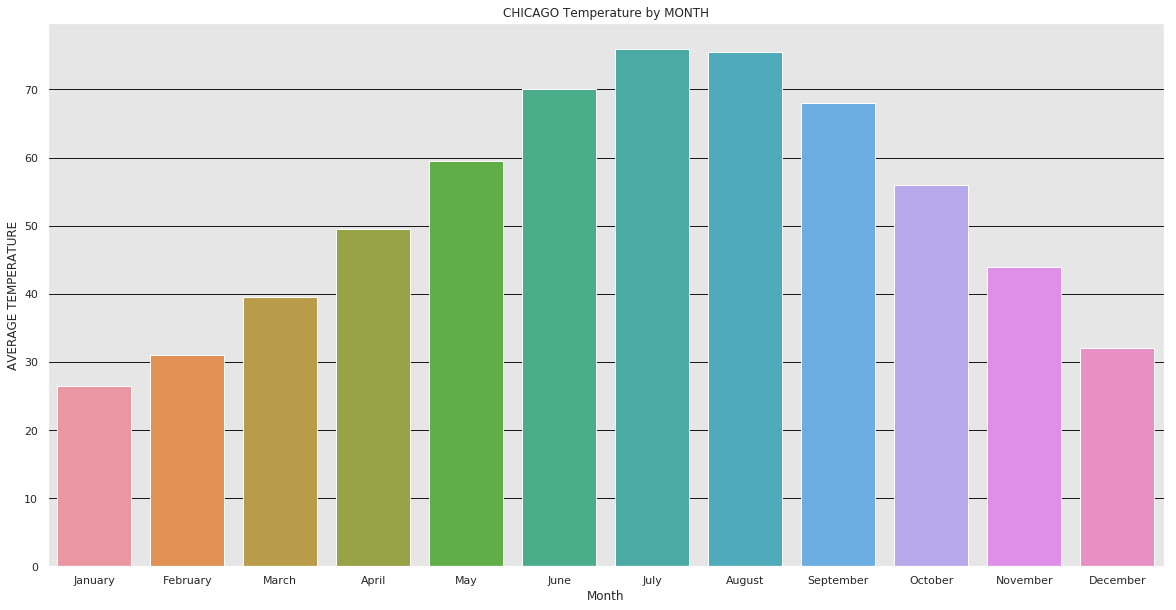

In [162]:
values = df_homicide.groupby(['Year','Month'])['Primary Type'].\
                  value_counts().unstack().reset_index()

fig, ax = plt.subplots(figsize=(20,10))
month_nms = ['January','February','March','April','May','June','July','August'\
             ,'September','October','November','December']    
sns.set()
sns.set_style({"axes.facecolor": "0.9",'grid.color': '0.1'})
fig = sns.barplot(x='Month',
                  y='HOMICIDE',
                  data=values)
ax.set_xticklabels(month_nms)
plt.title("CHICAGO MURDER RATES by MONTH -- All Years")


mntemp = [26.5,31,39.5,49.5,59.5,70,76,75.5,68,56,44,32]
df_temps = pd.DataFrame(list(zip(month_nms,mntemp)),
                       columns=['Month','AVERAGE TEMPERATURE'])
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Month', y='AVERAGE TEMPERATURE', data=df_temps)
ax.set_title("CHICAGO Temperature by MONTH")

Text(0.5,1,'HOMICIDE BY DAY OF THE WEEK -- All Years')

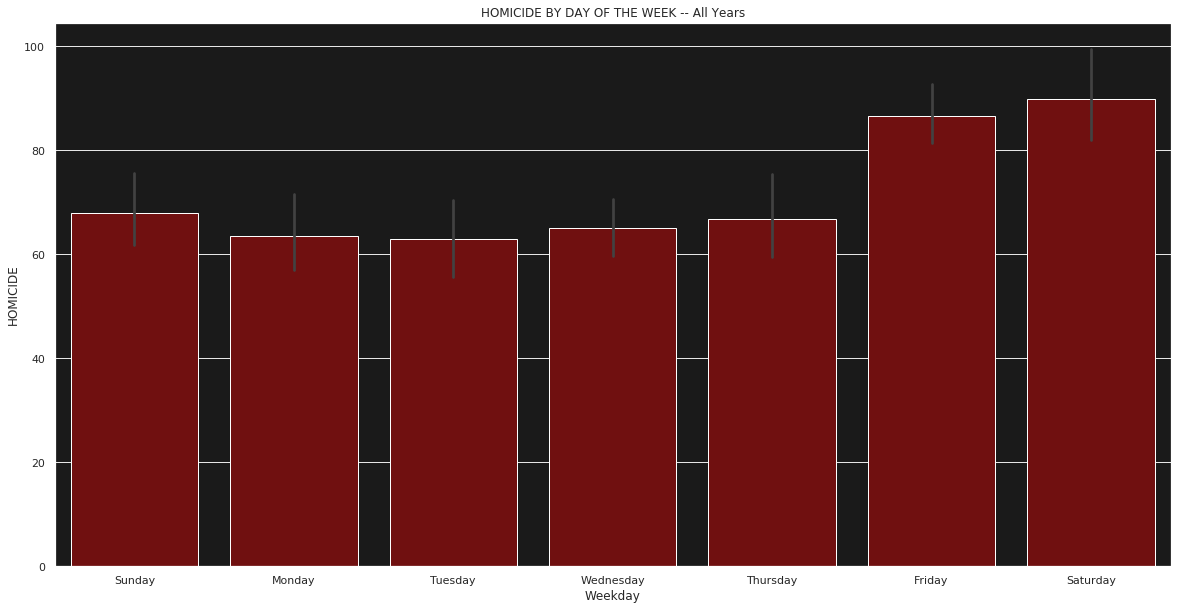

In [181]:
# plot homicide rates vs. day of the week
fig, ax = plt.subplots(figsize=(20,10))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
sns.set()
fig = sns.barplot(x='Weekday',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','Weekday'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='maroon')
ax.set_xticklabels(week_days)
plt.title('HOMICIDE BY DAY OF THE WEEK -- All Years')

Text(0.5,1,'HOMICIDE BY HOUR OF THE DAY -- All Years')

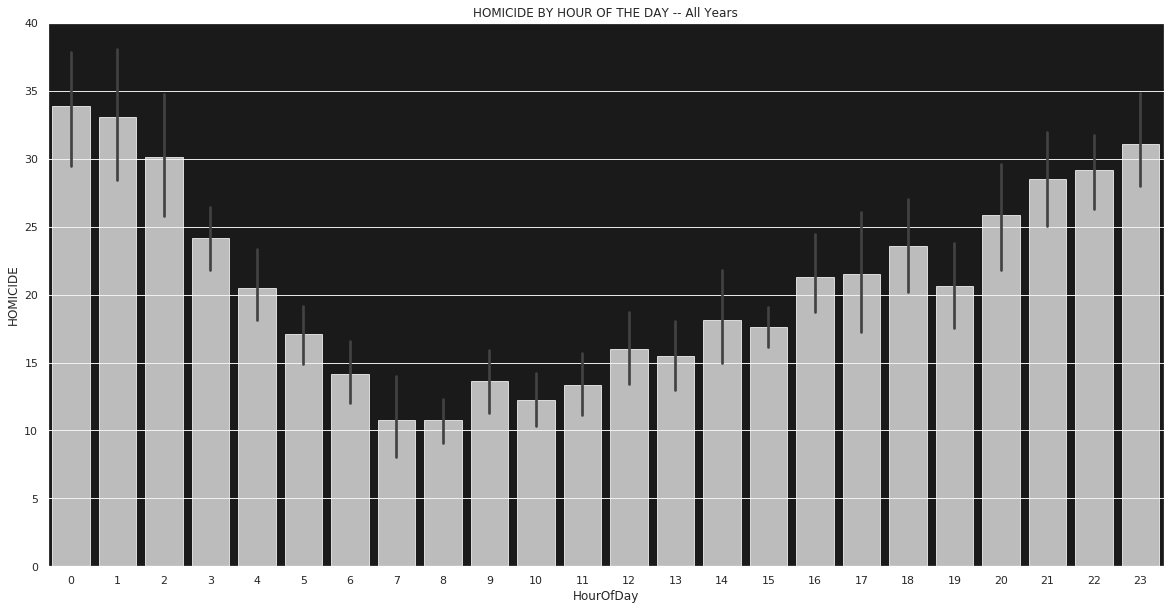

In [180]:
fig, ax = plt.subplots(figsize=(20,10))
sns.set()
sns.set_style({"axes.facecolor": "0.1",'grid.color': '0.9'})
fig = sns.barplot(x='HourOfDay',
                  y='HOMICIDE',
                  data=df_homicide.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='0.95422',
                  alpha=0.75)
plt.title('HOMICIDE BY HOUR OF THE DAY -- All Years')

In [10]:
# plot chloropleth maps 2001 - 2017
def toString(x):
    return str(int(x))
df_homicide_allyears = df_homicide.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)
# ______________________________________________________#
chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)
# plot 2016-2018 chloropleth map

#

In [11]:
# plot 2016-2018 chloropleth map

df_homicide_after_2015 = df_homicide[df_homicide['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicide per Police District : 2016-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map2.html") 
IFrame('map2.html', width=990, height=700)

In [12]:
# plot heatmap all districts -- (2016-2018)
after_2015_geo = []
for index, row in df_homicide[df_homicide['Year']>=2016][['Latitude','Longitude','District']].dropna().iterrows():
    after_2015_geo.append([row["Latitude"], row["Longitude"],row['District']])
# ___________________________________________________________________
chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='HeatMap Homicides : 2016-2017',
    highlight=True
    )
m.add_child(plugins.HeatMap(after_2015_geo,
                            name='all_homicides_2016_to_2017',
                            radius=5,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

## Inferences about Visualizations

In [16]:
df_homicide.head()

,index,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location,Month,Day,Weekday,HourOfDay
505,697802,2001,2001-01-01 10:40:00,HOMICIDE,False,False,11.0,CHA STAIRWELL,01A,1159921.0,1899604.0,41.880225,-87.688249,"(41.880224549, -87.688248952)",1,1,0,10
506,697881,2001,2001-01-01 15:10:00,HOMICIDE,False,False,14.0,AUTO,01A,1156620.0,1915710.0,41.924488,-87.699933,"(41.924488265, -87.699933231)",1,1,0,15
507,698235,2001,2001-01-06 08:54:00,HOMICIDE,False,False,12.0,AUTO,01A,1165996.0,1891724.0,41.858474,-87.666167,"(41.858473695, -87.666167161)",1,6,5,8
508,698337,2001,2001-01-06 13:30:00,HOMICIDE,True,False,5.0,ALLEY,01A,1171768.0,1827002.0,41.680744,-87.646876,"(41.680743671, -87.646876459)",1,6,5,13
509,698439,2001,2001-01-06 23:38:00,HOMICIDE,True,False,25.0,STREET,01A,1137239.0,1915361.0,41.923901,-87.771157,"(41.923901331, -87.771156586)",1,6,5,23


In [25]:
keep_cols = ['Year','Date','Primary Type','Arrest','Domestic','District','Location Description',
             'FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location']
db = crime_data[keep_cols]
db

,Year,Date,Primary Type,Arrest,Domestic,District,Location Description,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude,Location
0,2015,03/18/2015 07:44:00 PM,BATTERY,False,False,11.0,STREET,04B,1144606.0,1903566.0,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,2015,03/18/2015 11:00:00 PM,OTHER OFFENSE,True,False,7.0,STREET,26,1166468.0,1860715.0,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,2015,03/18/2015 10:45:00 PM,BATTERY,False,True,2.0,APARTMENT,08B,1185075.0,1875622.0,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,2015,03/18/2015 10:30:00 PM,BATTERY,False,False,2.0,APARTMENT,08B,1178033.0,1870804.0,41.800802,-87.622619,"(41.800802415, -87.622619343)"
4,2015,03/18/2015 09:00:00 PM,ROBBERY,False,False,11.0,SIDEWALK,03,1144920.0,1898709.0,41.878065,-87.743354,"(41.878064761, -87.743354013)"
5,2015,03/18/2015 10:00:00 PM,BATTERY,False,False,2.0,APARTMENT,08B,1183018.0,1872537.0,41.805443,-87.604284,"(41.805443345, -87.604283976)"
6,2015,03/18/2015 11:00:00 PM,BATTERY,False,True,7.0,APARTMENT,08B,1170859.0,1858210.0,41.766403,-87.649296,"(41.766402779, -87.649296123)"
7,2015,03/18/2015 09:35:00 PM,BATTERY,False,True,2.0,APARTMENT,08B,1178746.0,1876914.0,41.817553,-87.619819,"(41.817552577, -87.619818523)"
8,2015,03/18/2015 10:09:00 PM,NARCOTICS,True,False,9.0,STREET,18,1164279.0,1880656.0,41.828138,-87.672782,"(41.828138428, -87.672782106)"
9,2015,03/18/2015 09:25:00 PM,BATTERY,False,False,5.0,RESIDENCE PORCH/HALLWAY,08B,1179637.0,1840444.0,41.717455,-87.617663,"(41.71745472, -87.617663257)"


In [90]:
work1 = db[['Primary Type', 'Arrest']]
work1.head()

,Primary Type,Arrest
0,BATTERY,False
1,OTHER OFFENSE,True
2,BATTERY,False
3,BATTERY,False
4,ROBBERY,False


# # Which Crime has lowest number of Arrests?

In [136]:
no_arrests = work1.loc[work1['Arrest']==False]
no_arrests = no_arrests.groupby('Primary Type').count()
no_arrests.reset_index(inplace=True)

no_arrests.head()

,Primary Type,Arrest
0,ARSON,9703
1,ASSAULT,321980
2,BATTERY,952234
3,BURGLARY,365960
4,CONCEALED CARRY LICENSE VIOLATION,19


In [87]:
# plot bar chart of homicide rates for all years
def color_palette2(values):
    clrs = []
    below = np.percentile(values['Arrest'], 50) # return 50th percentile, e.g median.
    med = np.percentile(values['Arrest'], 90)
    for x in values['Arrest']:
        if (x <= below):
            clrs.append('green')
        elif (x > below  and x <= med):
            clrs.append('orange')
        elif (x>med):
            clrs.append('maroon')
    return clrs

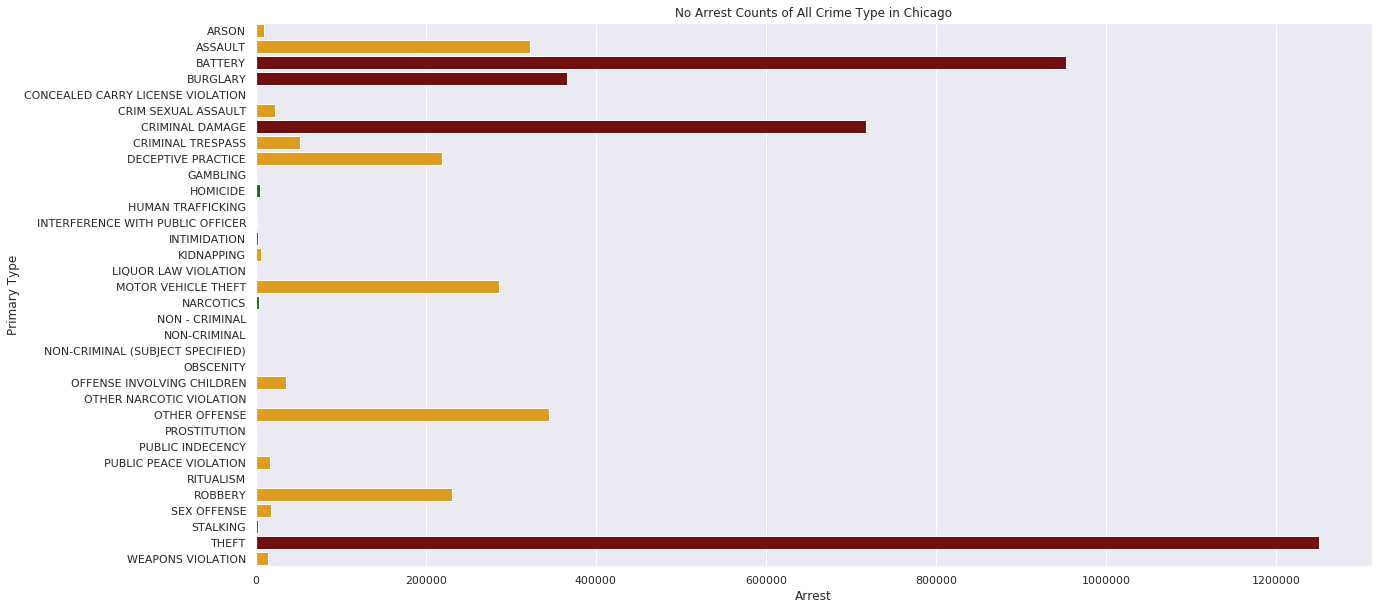

In [139]:
fig,ax = plt.subplots(figsize=(20,10))
sns.set()
clrs = color_palette2(no_arrests)

fig = sns.barplot(x='Arrest',
y='Primary Type',
data=no_arrests,
palette = clrs,).set_title("No Arrest Counts of All Crime Type in Chicago")


## Seems like Thieves got the easiest Job to do in Chicago !!! :-x
And Secondly is "Battery" crime. Moreover, Homicides are taken seriously.
Now as I have found the easiest job, I need to know where its easy not to get caught i.e.
## Region with Lowest Arrests of All Crimes

In [154]:
def toString(x):
    return str(int(x))

work2 = db[['District', 'Arrest']]
regions = work2.groupby(['District']).count().Arrest.reset_index()
regions['District'] = regions['District'].apply(toString)
regions.head()

,District,Arrest
0,1,262680
1,2,320694
2,3,343186
3,4,382819
4,5,299298


In [155]:
regions_of_noarr = work2.loc[db['Arrest']==False].groupby(['District']).count().Arrest.reset_index()
regions_of_noarr['District'] = regions_of_noarr['District'].apply(toString)
regions_of_noarr.head()

,District,Arrest
0,1,185602
1,2,229997
2,3,249421
3,4,292734
4,5,220391


In [157]:
chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=regions,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Total Crimes Count per Police District',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

In [158]:
# ______________________________________________________#

chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

m.choropleth(
    geo_data='chicago_police_districts.geojson',
    name='choropleth',
    data=regions_of_noarr,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='No_Arrests Count per Police District',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map4.html") 
IFrame('map4.html', width=990, height=700)

### Sooooo... Found that the Area around  Airport has highest Crimes and region has highest number of No-Arrests. I'm shifting!!!

## <center> Similarly, you can make many other visualization and inference from any new angle to get insight into another interesting fact about Chicago homicide. 
(though homicide is not interesting) 